In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd

np.random.seed(123)

# Turn off progress printing 
solvers.options['show_progress'] = False

In [3]:
#pip install cvxopt

In [4]:
import plotly
import cufflinks
plotly.__version__

'5.16.0'

In [5]:
# pip install cufflinks

In [6]:
import chart_studio 
# chart_studio.plotly

In [7]:
#import plotly.plotly as py  
import plotly.tools as tls   
#from plotly.graph_objs import *

In [8]:
#pip install chart-studio

In [9]:
n_assets = 4
n_obs = 1000
return_vec = np.random.randn(n_assets, n_obs)

In [152]:
return_vec

array([[-1.0856306 ,  0.99734545,  0.2829785 , ..., -0.90932702,
         0.47026375, -1.11143045],
       [-0.74882747,  0.56759473,  0.71815054, ..., -0.35929672,
        -1.60969508,  0.01357006],
       [-1.77422355, -1.20137731,  1.09625679, ...,  2.04043199,
         1.01591697, -1.63378817],
       [-0.45059869,  0.60959032,  1.17374438, ..., -0.1227329 ,
         1.79448602, -0.32050951]])

In [115]:
len(return_vec[0])

1000

In [ ]:
fig = plt.figure()
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')
#chart_studio.plotly.iplot_mpl(fig, filename='s6_damped_oscillation')

: 

: 

In [11]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print(rand_weights(n_assets))
print(rand_weights(n_assets))

[0.54066805 0.2360283  0.11660484 0.1066988 ]
[0.27638339 0.03006307 0.47850085 0.21505269]


In [12]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''
    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [13]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])

# PORTEFEUILLE 1 INDICE CAC40

In [192]:
import cvxpy as cp
import numpy as np

In [99]:
ptf1 = ['RI_PA','ORA_PA','CA_PA','ML_PA','VIE_PA','ACA_PA','MC_PA','SGO_PA','CAP_PA','WLN_PA','KER_PA','ATO_PA','ENGI_PA','AIR_PA','BN_PA','DG_PA','EN_PA','HO_PA','BNP_PA','SW_PA','OR_PA','GLE_PA',
'LR_PA','AI_PA','VIV_PA','SU_PA','SAN_PA','AC_PA']

In [6]:
import pymongo
import pandas as pd
connection_string = "mongodb://localhost:27017"
client = pymongo.MongoClient(connection_string)
data_name = 'MemoireEsgf'
db = client[data_name]
return_matrix = []
dCloseData = pd.DataFrame()
for ticket in ptf1:
    print(ticket)
    collection = db[f'{ticket}']
    df = pd.DataFrame(list(collection.find()))
    df = df.drop('_id', axis=1)
    # Get return
    stock_returns = df['Close'].pct_change().dropna()
    dCloseData[f'Renta_{ticket}'] = stock_returns
    return_matrix.append(stock_returns.values)

RI_PA
ORA_PA
CA_PA
ML_PA
VIE_PA
ACA_PA
MC_PA
SGO_PA
CAP_PA
WLN_PA
KER_PA
ATO_PA
ENGI_PA
AIR_PA
BN_PA
DG_PA
EN_PA
HO_PA
BNP_PA
SW_PA
OR_PA
GLE_PA
LR_PA
AI_PA
VIV_PA
SU_PA
SAN_PA
AC_PA


In [7]:
dCloseData

,Renta_RI_PA,Renta_ORA_PA,Renta_CA_PA,Renta_ML_PA,Renta_VIE_PA,Renta_ACA_PA,Renta_MC_PA,Renta_SGO_PA,Renta_CAP_PA,Renta_WLN_PA,...,Renta_BNP_PA,Renta_SW_PA,Renta_OR_PA,Renta_GLE_PA,Renta_LR_PA,Renta_AI_PA,Renta_VIV_PA,Renta_SU_PA,Renta_SAN_PA,Renta_AC_PA
1,-0.019146,0.011444,0.014797,-0.019381,0.014386,0.004040,-0.013512,-0.021819,0.000539,0.008157,...,0.011775,-0.013230,-0.014760,0.000231,-0.011686,-0.004376,0.001528,-0.011857,0.025926,-0.006630
2,0.008969,-0.013100,0.000304,0.039909,-0.027553,0.019113,0.009720,0.012228,0.021563,-0.003699,...,0.018534,0.000000,-0.006597,0.030730,0.005031,0.004850,0.009810,0.015188,-0.001960,0.010208
3,0.009673,-0.001307,-0.014273,-0.000548,0.009167,0.046501,0.010794,0.013870,0.006069,-0.002320,...,0.022641,0.001265,0.013697,0.020623,0.017772,0.007994,0.001080,0.006733,-0.004444,0.015157
4,-0.007250,0.019031,0.015404,0.006948,-0.009496,0.019807,-0.015584,0.002317,-0.012064,-0.012558,...,0.010552,-0.007074,-0.022383,0.000220,-0.022381,-0.002394,0.013371,-0.018130,0.012250,0.004594
5,0.011998,-0.005533,0.004551,0.009079,0.020008,0.015517,0.010114,0.003412,0.000000,0.005417,...,-0.006859,0.006870,0.007958,0.004611,0.001509,0.009000,-0.000851,0.001816,-0.006769,0.016006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.007299,0.002148,0.003582,-0.002107,0.006817,-0.002262,0.002042,-0.000172,-0.006418,-0.009355,...,-0.002224,0.008125,0.002748,-0.000964,0.000449,0.000860,0.000734,0.003977,0.005911,0.000928
274,0.006211,0.005067,0.001373,0.008445,0.007484,0.009419,0.016809,0.016196,0.018763,0.018213,...,0.020408,0.002619,0.009341,0.012927,0.013689,0.015107,0.005133,0.014950,0.005774,0.016079
275,0.006430,0.005429,-0.045517,0.013608,0.007428,0.010714,0.014402,0.006612,0.019626,-0.002650,...,0.006723,-0.003416,0.009748,0.004952,0.009520,0.001331,0.016294,0.009946,0.003928,0.006695
276,-0.006900,0.000000,0.007182,-0.005163,-0.003160,0.000342,-0.007407,0.004548,0.014806,0.005314,...,-0.000334,-0.001210,0.002322,-0.000379,0.000877,0.004350,-0.003829,-0.003615,-0.004716,-0.000907


## Graphique

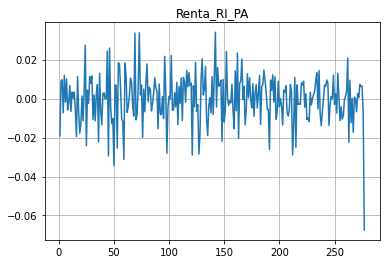

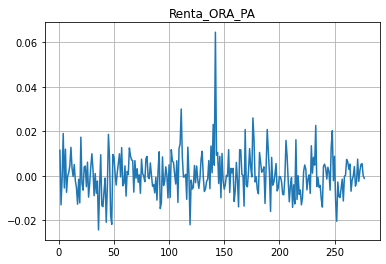

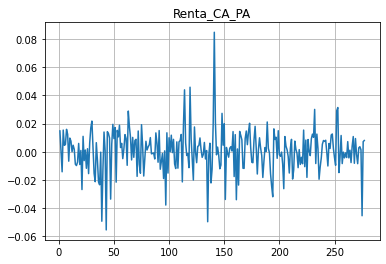

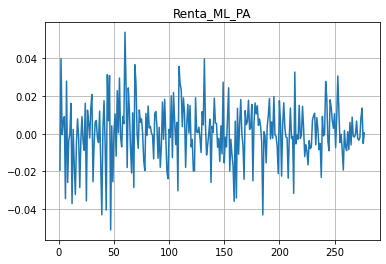

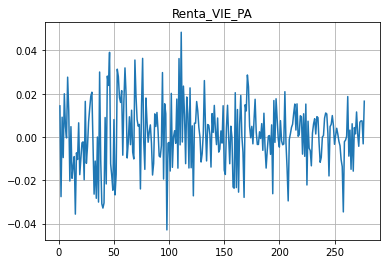

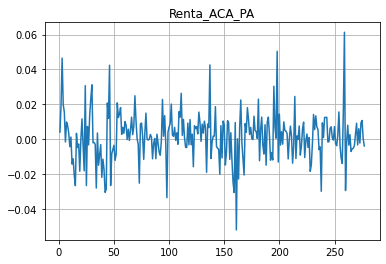

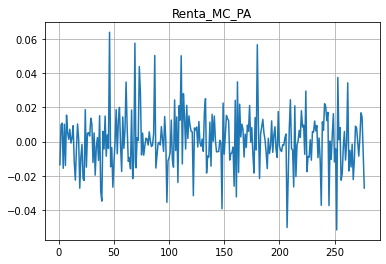

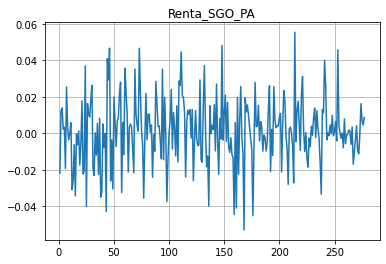

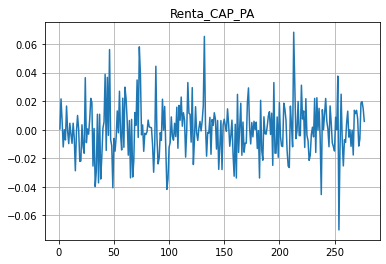

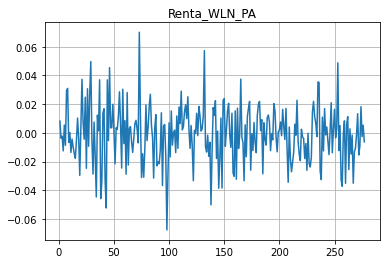

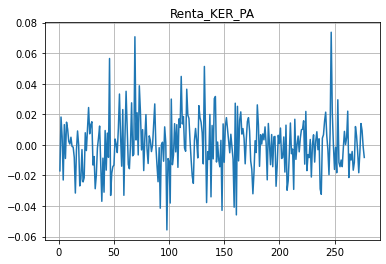

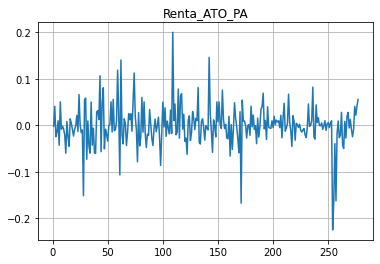

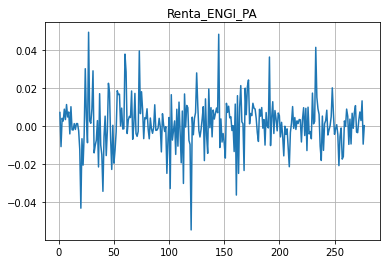

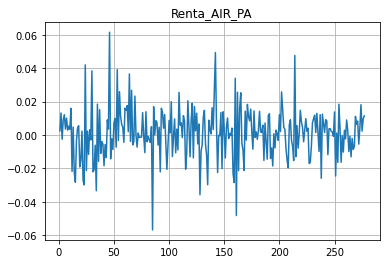

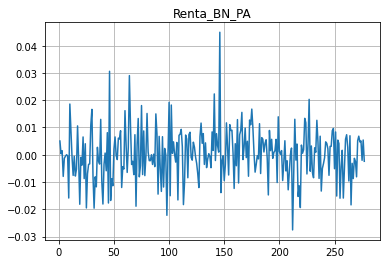

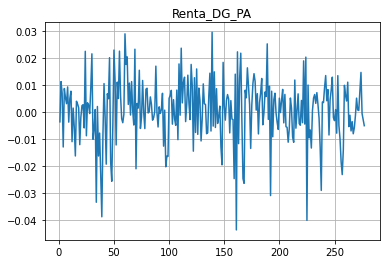

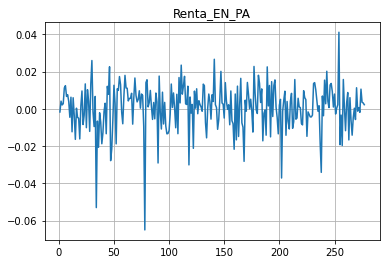

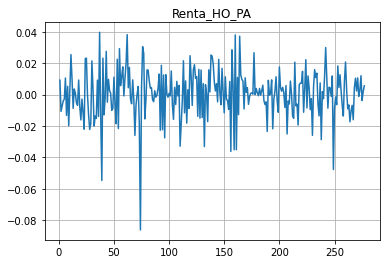

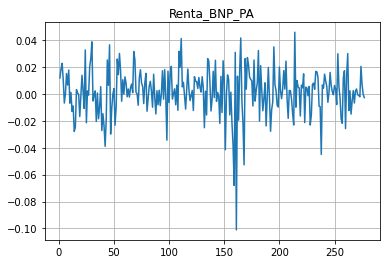

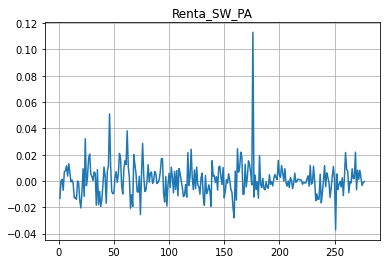

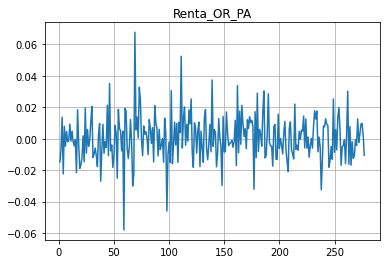

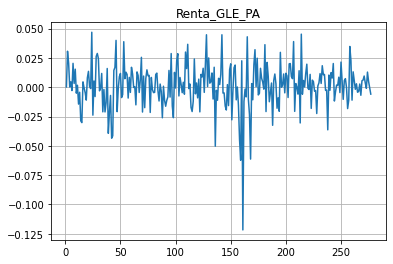

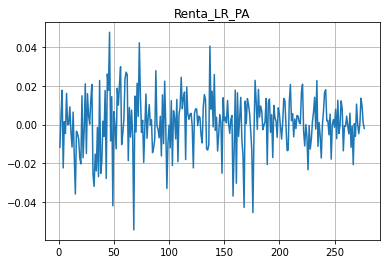

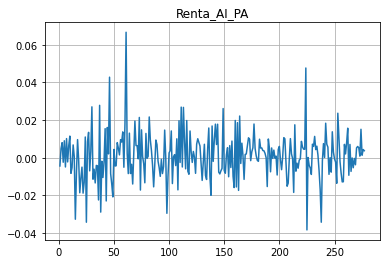

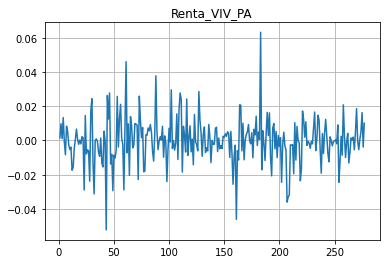

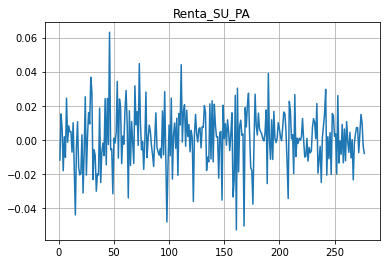

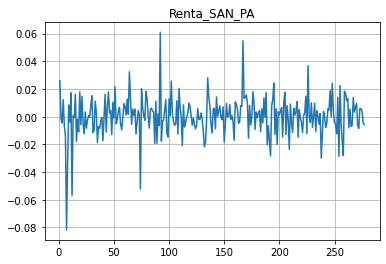

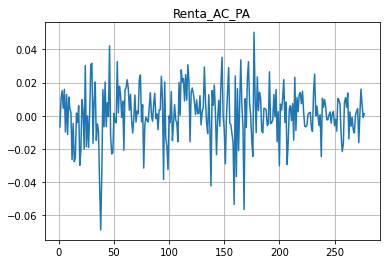

In [161]:
for name in dCloseData.columns:
    dCloseData[name].plot()
    plt.title(name)
    plt.grid()
    plt.show()

## Rendement moyen

In [8]:
dohMean = dCloseData.mean()
dohMean

Renta_RI_PA     -0.000069
Renta_ORA_PA     0.000433
Renta_CA_PA      0.000539
Renta_ML_PA      0.000555
Renta_VIE_PA     0.000873
Renta_ACA_PA     0.001397
Renta_MC_PA      0.000649
Renta_SGO_PA     0.001332
Renta_CAP_PA    -0.000019
Renta_WLN_PA    -0.001089
Renta_KER_PA    -0.000152
Renta_ATO_PA    -0.000506
Renta_ENGI_PA    0.001085
Renta_AIR_PA     0.001168
Renta_BN_PA      0.000173
Renta_DG_PA      0.000620
Renta_EN_PA      0.000589
Renta_HO_PA      0.000469
Renta_BNP_PA     0.001350
Renta_SW_PA      0.000938
Renta_OR_PA      0.000546
Renta_GLE_PA     0.001141
Renta_LR_PA      0.000556
Renta_AI_PA      0.000974
Renta_VIV_PA    -0.000127
Renta_SU_PA      0.000840
Renta_SAN_PA     0.000386
Renta_AC_PA      0.001093
dtype: float64

In [3]:
# Liste des actifs dans le portefeuille
ptf1 = ['RI_PA','ORA_PA','CA_PA','ML_PA','VIE_PA','ACA_PA','MC_PA','SGO_PA','CAP_PA','WLN_PA','KER_PA','ATO_PA','ENGI_PA','AIR_PA','BN_PA','DG_PA',
'EN_PA','HO_PA','BNP_PA','SW_PA','OR_PA','GLE_PA','LR_PA','AI_PA','VIV_PA','SU_PA','SAN_PA','AC_PA']

# Rendements attendus moyens de chaque actif (hypothétiques)
rendements_attendus = np.array([0.018,0.014,0.021,0.044,0.040,0.042,0.048,0.065,0.035,0.047,0.035,0.087,0.017,0.018,0.010,0.038,0.033,0.009,0.055,
0.005,0.025,0.030,0.018,0.044,0.038,0.017,0.008,0.033])
# Matrice de covariance des rendements (hypothétique)
matrice_covariance = cov = dCloseData.cov().values
# Poids initiaux (équipondérés)
poids_initiaux = np.array([1/len(ptf1)] * len(ptf1))
# Variables de décision (poids des actifs)
x = cp.Variable(len(ptf1))
x


NameError: name 'np' is not defined

In [198]:
# Contraintes
contraintes = [
    cp.sum(x) == 1,  # Somme des poids égale à 1
    x >= 0  # Poids non négatifs
]

[Equality(Expression(AFFINE, UNKNOWN, ()), Constant(CONSTANT, NONNEGATIVE, ())),
 Inequality(Constant(CONSTANT, ZERO, ()))]

In [199]:
# Fonction objectif (maximisation du rendement pour cet exemple)
rendement_portefeuille = rendements_attendus @ x


In [200]:
rendement_portefeuille

Expression(AFFINE, UNKNOWN, ())

In [202]:
pd.set_option('display.max_columns', None)
fonction_objectif = cp.Maximize(rendement_portefeuille)
# Problème d'optimisation
probleme = cp.Problem(fonction_objectif, contraintes)
# Résolution du problème
probleme.solve()
# Affichage des résultats
print("Poids optimaux des actifs dans le portefeuille :")
for i, actif in enumerate(ptf1):
    print(f"{actif}: {x.value[i].round(4)}")

print(f"Rendement attendu du portefeuille : {rendement_portefeuille.value.round(4) * 100}%")

Poids optimaux des actifs dans le portefeuille :
RI_PA: 0.0
ORA_PA: 0.0
CA_PA: 0.0
ML_PA: 0.0
VIE_PA: 0.0
ACA_PA: 0.0
MC_PA: 0.0
SGO_PA: 0.0
CAP_PA: 0.0
WLN_PA: 0.0
KER_PA: 0.0
ATO_PA: 1.0
ENGI_PA: 0.0
AIR_PA: 0.0
BN_PA: 0.0
DG_PA: 0.0
EN_PA: 0.0
HO_PA: 0.0
BNP_PA: 0.0
SW_PA: 0.0
OR_PA: 0.0
GLE_PA: 0.0
LR_PA: 0.0
AI_PA: 0.0
VIV_PA: 0.0
SU_PA: 0.0
SAN_PA: 0.0
AC_PA: 0.0
Rendement attendu du portefeuille : 8.7%


In [207]:
return_matrix = np.array(return_matrix)
return_matrix

array([[-0.0191462 ,  0.00896858,  0.00967329, ...,  0.00643004,
        -0.00690003, -0.06742154],
       [ 0.01144351, -0.0131004 , -0.00130743, ...,  0.00542949,
         0.        , -0.00115719],
       [ 0.01479654,  0.00030385, -0.01427272, ..., -0.04551686,
         0.00718184,  0.00798627],
       ...,
       [-0.01185653,  0.01518833,  0.00673256, ...,  0.00994588,
        -0.00361507, -0.008007  ],
       [ 0.02592593, -0.00195972, -0.00444397, ...,  0.00392828,
        -0.00471557, -0.00564514],
       [-0.00663025,  0.01020812,  0.01515741, ...,  0.00669511,
        -0.00090697,  0.00121032]])

In [216]:
dCloseData

,Renta_RI_PA,Renta_ORA_PA,Renta_CA_PA,Renta_ML_PA,Renta_VIE_PA,Renta_ACA_PA,Renta_MC_PA,Renta_SGO_PA,Renta_CAP_PA,Renta_WLN_PA,Renta_KER_PA,Renta_ATO_PA,Renta_ENGI_PA,Renta_AIR_PA,Renta_BN_PA,Renta_DG_PA,Renta_EN_PA,Renta_HO_PA,Renta_BNP_PA,Renta_SW_PA,Renta_OR_PA,Renta_GLE_PA,Renta_LR_PA,Renta_AI_PA,Renta_VIV_PA,Renta_SU_PA,Renta_SAN_PA,Renta_AC_PA
1,-0.019146,0.011444,0.014797,-0.019381,0.014386,0.004040,-0.013512,-0.021819,0.000539,0.008157,-0.017001,-0.002121,0.007086,0.002537,0.005025,-0.003597,-0.001708,0.009193,0.011775,-0.013230,-0.014760,0.000231,-0.011686,-0.004376,0.001528,-0.011857,0.025926,-0.006630
2,0.008969,-0.013100,0.000304,0.039909,-0.027553,0.019113,0.009720,0.012228,0.021563,-0.003699,0.018215,0.040816,-0.010875,0.013237,0.000370,0.011267,0.004105,-0.010693,0.018534,0.000000,-0.006597,0.030730,0.005031,0.004850,0.009810,0.015188,-0.001960,0.010208
3,0.009673,-0.001307,-0.014273,-0.000548,0.009167,0.046501,0.010794,0.013870,0.006069,-0.002320,0.005421,-0.024510,0.004042,-0.002498,0.001481,0.007031,0.002044,-0.007206,0.022641,0.001265,0.013697,0.020623,0.017772,0.007994,0.001080,0.006733,-0.004444,0.015157
4,-0.007250,0.019031,0.015404,0.006948,-0.009496,0.019807,-0.015584,0.002317,-0.012064,-0.012558,-0.023005,-0.014657,0.002576,0.009052,-0.007948,-0.012889,0.002720,-0.004032,0.010552,-0.007074,-0.022383,0.000220,-0.022381,-0.002394,0.013371,-0.018130,0.012250,0.004594
5,0.011998,-0.005533,0.004551,0.009079,0.020008,0.015517,0.010114,0.003412,0.000000,0.005417,0.013245,0.009775,0.008834,0.012216,-0.001304,0.008705,0.011190,-0.002834,-0.006859,0.006870,0.007958,0.004611,0.001509,0.009000,-0.000851,0.001816,-0.006769,0.016006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.007299,0.002148,0.003582,-0.002107,0.006817,-0.002262,0.002042,-0.000172,-0.006418,-0.009355,-0.004898,-0.008649,0.007354,0.004330,0.004694,0.007879,-0.001914,0.002644,-0.002224,0.008125,0.002748,-0.000964,0.000449,0.000860,0.000734,0.003977,0.005911,0.000928
274,0.006211,0.005067,0.001373,0.008445,0.007484,0.009419,0.016809,0.016196,0.018763,0.018213,0.013946,0.040614,0.002839,0.018171,0.005046,0.014657,0.010546,0.012057,0.020408,0.002619,0.009341,0.012927,0.013689,0.015107,0.005133,0.014950,0.005774,0.016079
275,0.006430,0.005429,-0.045517,0.013608,0.007428,0.010714,0.014402,0.006612,0.019626,-0.002650,0.009304,0.021683,0.013211,0.002420,-0.002045,-0.000578,0.003479,-0.003723,0.006723,-0.003416,0.009748,0.004952,0.009520,0.001331,0.016294,0.009946,0.003928,0.006695
276,-0.006900,0.000000,0.007182,-0.005163,-0.003160,0.000342,-0.007407,0.004548,0.014806,0.005314,-0.001403,0.040464,-0.009580,0.009656,0.005403,-0.002891,0.003152,0.001868,-0.000334,-0.001210,0.002322,-0.000379,0.000877,0.004350,-0.003829,-0.003615,-0.004716,-0.000907


In [31]:
import yfinance as yf
# get data yahoo finance
start = '2022-08-01'
end = '2023-08-31'
tickets = ['TTE','SAN.PA','BN.PA','ACA.PA','OR.PA','RNO.PA','STLAP.PA','ALO.PA','ENGI.PA','AIR.PA','CA.PA','MCD','NFLX','META','PYPL']
dCloseData2 = pd.DataFrame()
for ticket in tickets:
    stock = yf.Ticker(ticket).history(interval='1D', start=start, end=end)
    stock.reset_index(inplace=True)
    stock.drop(['Dividends','Stock Splits'], axis=1, inplace=True)
    stock['Date'] =  pd.to_datetime(stock['Date']).dt.strftime('%Y-%m-%d')
    #df = pd.DataFrame(list(collection.find()))
    #df = df.drop('_id', axis=1)
    stock_returns = stock['Close'].pct_change().dropna()
    dCloseData2[f'Renta_{ticket}'] = stock_returns
    #return_matrix.append(stock_returns.values)

In [32]:
dCloseData2

,Renta_TTE,Renta_SAN.PA,Renta_BN.PA,Renta_ACA.PA,Renta_OR.PA,Renta_RNO.PA,Renta_STLAP.PA,Renta_ALO.PA,Renta_ENGI.PA,Renta_AIR.PA,Renta_CA.PA,Renta_MCD,Renta_NFLX,Renta_META,Renta_PYPL
1,-0.033432,0.025926,0.005025,0.004040,-0.014760,-0.000667,0.016230,0.006938,0.007086,0.002537,0.014797,-0.012035,-0.021175,0.001626,0.012025
2,0.007982,-0.001960,0.000370,0.019113,-0.006597,-0.009850,0.009947,0.006029,-0.010875,0.013237,0.000304,0.003984,0.023982,0.053749,0.092491
3,0.003858,-0.004444,0.001481,0.046501,0.013697,-0.014163,-0.006381,0.009418,0.004042,-0.002498,-0.014273,-0.005532,0.014026,0.010486,-0.009600
4,0.004854,0.012250,-0.007948,0.019807,-0.022383,0.018129,0.000279,0.007210,0.002576,0.009052,0.015404,-0.005410,-0.013614,-0.020285,-0.017117
5,0.020733,-0.006769,-0.001304,0.015517,0.007958,0.013271,0.031263,0.012211,0.008834,0.012216,0.004551,-0.009374,0.029588,0.018790,0.009862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,-0.007243,0.003379,-0.001314,-0.003868,-0.011052,-0.003940,-0.007286,-0.009535,0.007041,-0.006898,-0.008212,0.001703,-0.048228,-0.025455,-0.017001
269,0.009403,0.006633,-0.002444,0.002471,-0.000502,0.018824,0.018104,-0.002407,0.010694,0.011208,0.009384,0.007898,0.022363,-0.004359,0.007906
270,0.005300,0.009731,-0.008104,0.009157,-0.004271,0.013656,0.003604,0.021311,-0.003256,0.006400,-0.001914,-0.003163,0.004879,0.016673,0.007844
271,0.009906,-0.006425,0.005130,-0.003315,0.012617,-0.015850,0.000718,0.016142,-0.003538,0.008376,-0.008493,-0.000317,0.028537,0.026631,0.013459


In [37]:
print(list(dCloseData2.columns))

['Renta_TTE', 'Renta_SAN.PA', 'Renta_BN.PA', 'Renta_ACA.PA', 'Renta_OR.PA', 'Renta_RNO.PA', 'Renta_STLAP.PA', 'Renta_ALO.PA', 'Renta_ENGI.PA', 'Renta_AIR.PA', 'Renta_CA.PA', 'Renta_MCD', 'Renta_NFLX', 'Renta_META', 'Renta_PYPL']


In [40]:
poids_actifs = {
    "Renta_TTE":  0.067,
    "Renta_SAN.PA": 0.067,
    "Renta_BN.PA":  0.067,
    "Renta_ACA.PA":  0.067,
    "Renta_OR.PA": 0.067,
    "Renta_RNO.PA": 0.067,
    "Renta_STLAP.PA":  0.067,
    "Renta_ALO.PA": 0.067,
    "Renta_ENGI.PA": 0.067,
    "Renta_AIR.PA": 0.067,
    "Renta_CA.PA": 0.067,
    "Renta_MCD": 0.067,
    "Renta_NFLX":0.067,
    "Renta_META": 0.067,
    "Renta_PYPL":  0.067,
}

In [43]:
import pymongo
import pandas as pd
import numpy as np

dCloseData2

rendements_actifs = {}
for i in dCloseData2.columns:
    rendements_actifs[f'{i}'] = list(dCloseData2[f'{i}'].values)

rendements_portefeuille = []
for actif, rendements in rendements_actifs.items():
    rendements_portefeuille.append(np.array(rendements) * poids_actifs[actif])
rendements_portefeuille_total = np.sum(rendements_portefeuille, axis=0)
volatilite_portefeuille = np.std(rendements_portefeuille_total, ddof=1)

print(f"Volatilité du portefeuille : {volatilite_portefeuille:.4f}")

    

Volatilité du portefeuille : 0.0086


In [ ]:
rendements_portefeuille = []
for actif, rendements in rendements_actifs.items():
    rendements_portefeuille.append(np.array(rendements) * poids_actifs[actif])
rendements_portefeuille_total = np.sum(rendements_portefeuille, axis=0)
volatilite_portefeuille = np.std(rendements_portefeuille_total, ddof=1)

print(f"Volatilité du portefeuille : {volatilite_portefeuille:.4f}")

In [26]:
poids_actifs = {
    "Renta_RI_PA":  0.039,
    "Renta_ORA_PA": 0.046,
    "Renta_CA_PA":  0.043,
    "Renta_ML_PA":  0.059,
    "Renta_VIE_PA": 0.047,
    "Renta_ACA_PA": 0.037,
    "Renta_MC_PA":  0.028,
    "Renta_SGO_PA": 0.043,
    "Renta_CAP_PA": 0.036,
    "Renta_WLN_PA": 0.030,
    "Renta_KER_PA": 0.018,
    "Renta_ATO_PA": 0.016,
    "Renta_ENGI_PA":0.053,
    "Renta_AIR_PA": 0.053,
    "Renta_BN_PA":  0.022,
    "Renta_DG_PA":  0.025,
    "Renta_EN_PA":  0.035,
    "Renta_HO_PA":  0.040,
    "Renta_BNP_PA": 0.042,
    "Renta_SW_PA":  0.024,
    "Renta_OR_PA":  0.024,
    "Renta_GLE_PA": 0.045,
    "Renta_LR_PA":  0.052,
    "Renta_AI_PA":  0.030,
    "Renta_VIV_PA": 0.024,
    "Renta_SU_PA":  0.037,
    "Renta_SAN_PA": 0.028,
    "Renta_AC_PA":  0.024,
}

In [27]:
import pymongo
import pandas as pd
import numpy as np

connection_string = "mongodb://localhost:27017"
client = pymongo.MongoClient(connection_string)
data_name = 'MemoireEsgf'
db = client[data_name]
return_matrix = []
dCloseData = pd.DataFrame()
for ticket in ptf1:
    collection = db[f'{ticket}']
    df = pd.DataFrame(list(collection.find()))
    df = df.drop('_id', axis=1)
    stock_returns = df['Close'].pct_change().dropna()
    dCloseData[f'Renta_{ticket}'] = stock_returns
    return_matrix.append(stock_returns.values)

rendements_actifs = {}
for i in dCloseData.columns:
    rendements_actifs[f'{i}'] = list(dCloseData[f'{i}'].values)

rendements_portefeuille = []
for actif, rendements in rendements_actifs.items():
    rendements_portefeuille.append(np.array(rendements) * poids_actifs[actif])
rendements_portefeuille_total = np.sum(rendements_portefeuille, axis=0)
volatilite_portefeuille = np.std(rendements_portefeuille_total, ddof=1)

print(f"Volatilité du portefeuille : {volatilite_portefeuille:.4f}")

    

Volatilité du portefeuille : 0.0096


In [10]:
rendements_actifs['Renta_RI_PA']

[-0.01914619641845572,
 0.00896858029551062,
 0.009673291143464047,
 -0.007250190810281998,
 0.011997945803397414,
 -0.0018041792982649296,
 0.010069770646561116,
 -0.005879401223949143,
 -0.0020570442693322866,
 0.006699315277483464,
 -0.00665473312221021,
 0.003349617380560277,
 0.0002568705860721554,
 0.0033375775760098314,
 -0.005885339193634653,
 -0.01956248214874401,
 0.011289131180961753,
 -0.00700942255679593,
 -0.01777771968402375,
 -0.013042390138437998,
 0.001348441337216233,
 -0.011311536307590964,
 0.0046307902009465884,
 0.02738621296213073,
 -0.024280795140158795,
 0.004327749289874783,
 -0.002423858558012304,
 0.011339104852822413,
 0.007741555423555813,
 0.011655610193573418,
 -0.010735822092023395,
 0.001852889414166059,
 -0.01136063050522651,
 0.0021378527111024503,
 0.007200079395721426,
 -0.022239978515870673,
 0.012997650251772574,
 -0.00614814691043597,
 -0.013448061255826649,
 0.002453680205221964,
 0.0029914792853347194,
 -0.000271049115920019,
 0.0,
 0.0244101

In [1]:
poids_actifs = {
    "Renta_RI_PA":  0.36,
    "Renta_ORA_PA": 0.36,
    "Renta_CA_PA":  0.36,
    "Renta_ML_PA":  0.36,
    "Renta_VIE_PA": 0.36,
    "Renta_ACA_PA": 0.36,
    "Renta_MC_PA":  0.36,
    "Renta_SGO_PA": 0.36,
    "Renta_CAP_PA": 0.36,
    "Renta_WLN_PA": 0.36,
    "Renta_KER_PA": 0.36,
    "Renta_ATO_PA": 0.36,
    "Renta_ENGI_PA":0.36,
    "Renta_AIR_PA": 0.36,
    "Renta_BN_PA":  0.36,
    "Renta_DG_PA":  0.36,
    "Renta_EN_PA":  0.36,
    "Renta_HO_PA":  0.36,
    "Renta_BNP_PA": 0.36,
    "Renta_SW_PA":  0.36,
    "Renta_OR_PA":  0.36,
    "Renta_GLE_PA": 0.36,
    "Renta_LR_PA":  0.36,
    "Renta_AI_PA":  0.36,
    "Renta_VIV_PA": 0.36,
    "Renta_SU_PA":  0.36,
    "Renta_SAN_PA": 0.36,
    "Renta_AC_PA":  0.36,
}

In [236]:

for actif, rendements in rendements_actifs.items():
    rendements_portefeuille.append(np.array(rendements) * poids_actifs[actif])
print(rendement_portefeuille)
# Calculez le rendement total du portefeuille
rendements_portefeuille_total = np.sum(rendements_portefeuille, axis=0)
# Calculez la volatilité du portefeuille (écart type)
volatilite_portefeuille = np.std(rendements_portefeuille_total, ddof=1)

print(f"Volatilité du portefeuille : {volatilite_portefeuille:.4f}")

[0.018 0.014 0.021 0.044 0.04  0.042 0.048 0.065 0.035 0.047 0.035 0.087
 0.017 0.018 0.01  0.038 0.033 0.009 0.055 0.005 0.025 0.03  0.018 0.044
 0.038 0.017 0.008 0.033] @ var1
Volatilité du portefeuille : 0.0973


In [234]:
#rendements_actifs = {
#    "RI_PA": [0.02, 0.03, -0.01, 0.02, -0.005],
#    "ORA_PA": [0.015, 0.01, 0.02, 0.01, 0.012],
#    # Ajoutez les rendements pour les autres actifs
#}

# Poids des actifs dans le portefeuille
#poids_actifs = {
#    "RI_PA": 0.05,
#    "ORA_PA": 0.05,
#    # Ajoutez les poids pour les autres actifs
#}

# Créez une liste des rendements combinés du portefeuille
rendements_portefeuille = []

for actif, rendements in rendements_actifs.items():
    rendements_portefeuille.append(np.array(rendements) * poids_actifs[actif])
print(rendement_portefeuille)
# Calculez le rendement total du portefeuille
rendements_portefeuille_total = np.sum(rendements_portefeuille, axis=0)
# Calculez la volatilité du portefeuille (écart type)
volatilite_portefeuille = np.std(rendements_portefeuille_total, ddof=1)

print(f"Volatilité du portefeuille : {volatilite_portefeuille:.4f}")

[0.018 0.014 0.021 0.044 0.04  0.042 0.048 0.065 0.035 0.047 0.035 0.087
 0.017 0.018 0.01  0.038 0.033 0.009 0.055 0.005 0.025 0.03  0.018 0.044
 0.038 0.017 0.008 0.033] @ var1
Volatilité du portefeuille : 0.0130


## Covariance

In [193]:
cov = dCloseData.cov()
cov.values

array([[ 1.54973914e-04,  1.63252213e-05,  2.47491011e-05,
         6.51857064e-05,  4.88492896e-05,  4.01677152e-05,
         1.15154390e-04,  6.59834316e-05,  7.49075428e-05,
         8.27433926e-05,  1.16735016e-04,  6.47672610e-05,
         4.30344390e-05,  5.33387780e-05,  5.06675876e-05,
         4.67252981e-05,  3.73655819e-05,  7.48420633e-06,
         5.86442942e-05,  3.74689935e-05,  1.11290960e-04,
         4.10812698e-05,  6.43576189e-05,  6.71405983e-05,
         2.93220078e-05,  8.95126558e-05,  1.43978876e-05,
         5.36156004e-05],
       [ 1.63252213e-05,  9.12993251e-05,  4.09164730e-05,
         1.94994619e-05,  3.65379231e-05,  2.73539765e-05,
         3.68381922e-06,  2.11636623e-05,  9.13648482e-06,
         2.57701016e-05,  2.09176546e-05,  6.83355703e-05,
         3.39966863e-05,  3.35480430e-05,  2.57786773e-05,
         3.25341243e-05,  3.66257062e-05,  1.87737414e-05,
         4.15723469e-05,  2.25117807e-05,  9.54375505e-06,
         3.79775459e-05,  5.28

## Portfolio aléatoire
- Nous générerons des portefeuilles aléatoires. En eux, la somme des actions est égale à 1 (un).

In [165]:
cnt = len(dCloseData.columns)

def randPortf():
    res = np.exp(np.random.randn(cnt))
    res = res / res.sum()
    return res

r = randPortf()
print(r)
print(r.sum())

[0.03599844 0.0575917  0.03239416 0.02049259 0.00877195 0.00661338
 0.03591658 0.03649519 0.00947609 0.02064234 0.13110688 0.01136232
 0.02599103 0.02471865 0.03316591 0.09707241 0.05908618 0.00727409
 0.0211317  0.00188585 0.0118148  0.00248925 0.0043272  0.02321556
 0.15293871 0.02723302 0.09893286 0.00186118]
0.9999999999999999


## Rendement du portefeuille
- Le rendement du portefeuille est calculé comme la somme des parts des rendements de chaque action du portefeuille.

In [166]:
def dohPortf(r):
    return np.matmul(dohMean.values,r)

r = randPortf()
print(r)
d = dohPortf(r)
print(d)

[0.01206444 0.01759656 0.01888071 0.10491359 0.01363693 0.01533345
 0.01944395 0.00414838 0.02507328 0.05847059 0.03015761 0.03989452
 0.04697975 0.02338854 0.02544326 0.03079424 0.04361493 0.023066
 0.01158833 0.05428814 0.0077345  0.01914954 0.0242804  0.0149565
 0.01701179 0.06840961 0.22159921 0.00808126]
0.00044641695121784824


## Risque de portefeuille
- Nous calculons le risque du portefeuille au moyen de produits matriciels d'actions du portefeuille et de matrices de covariance

In [167]:
def riskPortf(r):
    return np.sqrt(np.matmul(np.matmul(r,cov.values),r))

r = randPortf()
print(r)
rs = riskPortf(r)
print(rs)

[0.01620817 0.02704541 0.02750241 0.00473959 0.02747348 0.02499406
 0.04137872 0.00774123 0.02364401 0.01038776 0.03308846 0.13349637
 0.05596538 0.01557374 0.03230338 0.03001186 0.00668022 0.21275886
 0.04473537 0.06686508 0.01129805 0.00725942 0.01487312 0.02755981
 0.02096842 0.00886982 0.05276027 0.01381752]
0.010600044782898404


Générons un ensemble de portefeuilles et affichons le résultat sur un graphique risque-rendement. Trouvons les paramètres du portefeuille optimal pour le risque minimum et le ratio de Sharpe maximum. Comparons avec les données du portefeuille moyen.

In [186]:
risk = np.zeros(len(dCloseData.columns))
N = 1000

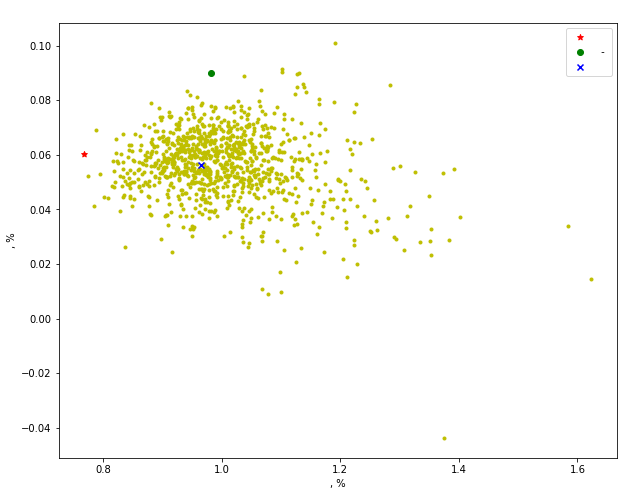

In [187]:
risk = np.zeros(N)
doh = np.zeros(N)
portf = np.zeros((N,cnt))

for n in range(N):
    r = randPortf()

    portf[n,:] = r
    risk[n] = riskPortf(r)
    doh[n] = dohPortf(r)

plt.figure(figsize=(10,8))

plt.scatter(risk*100,doh*100,c='y',marker='.')
plt.xlabel(', %')
plt.ylabel(', %')
plt.title(" ")

min_risk = np.argmin(risk)
plt.scatter([(risk[min_risk])*100],[(doh[min_risk])*100],c='r',marker='*',label=' ')

maxSharpKoef = np.argmax(doh/risk)
plt.scatter([risk[maxSharpKoef]*100],[doh[maxSharpKoef]*100],c='g',marker='o',label=' - ')

r_mean = np.ones(cnt)/cnt
risk_mean = riskPortf(r_mean)
doh_mean = dohPortf(r_mean)
plt.scatter([risk_mean*100],[doh_mean*100],c='b',marker='x',label=' ')

plt.legend()

plt.show()

In [190]:
print('----------   ----------')
print()
print(" = %1.2f%%" % (float(risk[min_risk])*100.))
print(" = %1.2f%%" % (float(doh[min_risk])*100.)) 
print()
print(pd.DataFrame([portf[min_risk]*100],columns=dCloseData.columns,index=[', %']).T)
print()

print('----------    ----------')
print()
print(" = %1.2f%%" % (float(risk[maxSharpKoef])*100.))
print(" = %1.2f%%" % (float(doh[maxSharpKoef])*100.)) 
print()
print(pd.DataFrame([portf[maxSharpKoef]*100],columns=dCloseData.columns,index=[', %']).T)
print()

print('----------   ----------')
print()
print(" = %1.2f%%" % (float(risk_mean)*100.)) 
print(" = %1.2f%%" % (float(doh_mean)*100.)) 
print()
print(pd.DataFrame([r_mean*100],columns=dCloseData.columns,index=[', %']).T)
print()

----------   ----------

 = 0.77%
 = 0.06%

                     , %
Renta_RI_PA     1.944962
Renta_ORA_PA   10.249735
Renta_CA_PA     3.465142
Renta_ML_PA     1.299360
Renta_VIE_PA    2.705647
Renta_ACA_PA    5.440003
Renta_MC_PA     0.091578
Renta_SGO_PA    0.448585
Renta_CAP_PA    0.186542
Renta_WLN_PA    0.737322
Renta_KER_PA    0.577291
Renta_ATO_PA    1.855462
Renta_ENGI_PA   6.716396
Renta_AIR_PA    0.490717
Renta_BN_PA     4.365626
Renta_DG_PA     0.663388
Renta_EN_PA     2.130619
Renta_HO_PA    22.302332
Renta_BNP_PA    0.447735
Renta_SW_PA     8.137133
Renta_OR_PA     7.569741
Renta_GLE_PA    1.403082
Renta_LR_PA     4.531731
Renta_AI_PA     1.660120
Renta_VIV_PA    1.588163
Renta_SU_PA     2.095864
Renta_SAN_PA    4.505667
Renta_AC_PA     2.390058

----------    ----------

 = 0.98%
 = 0.09%

                     , %
Renta_RI_PA     2.167131
Renta_ORA_PA    7.078908
Renta_CA_PA     3.533650
Renta_ML_PA     2.773015
Renta_VIE_PA    0.802008
Renta_ACA_PA   43.484344
Renta_MC_P

In [119]:
return_matrix = np.array(return_matrix)
n_assets = len(ptf1)
n_obs = len(return_matrix[0])

In [120]:
return_matrix

array([[-0.0191462 ,  0.00896858,  0.00967329, ...,  0.00643004,
        -0.00690003, -0.06742154],
       [ 0.01144351, -0.0131004 , -0.00130743, ...,  0.00542949,
         0.        , -0.00115719],
       [ 0.01479654,  0.00030385, -0.01427272, ..., -0.04551686,
         0.00718184,  0.00798627],
       ...,
       [-0.01185653,  0.01518833,  0.00673256, ...,  0.00994588,
        -0.00361507, -0.008007  ],
       [ 0.02592593, -0.00195972, -0.00444397, ...,  0.00392828,
        -0.00471557, -0.00564514],
       [-0.00663025,  0.01020812,  0.01515741, ...,  0.00669511,
        -0.00090697,  0.00121032]])

Text(0, 0.5, 'returns')

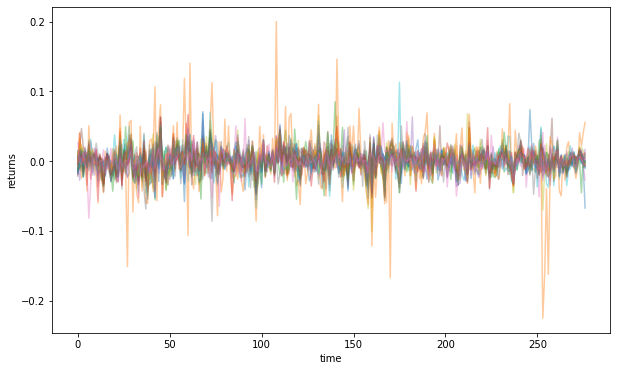

In [108]:
fig = plt.figure(figsize=(10,6))
plt.plot(return_matrix.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')
#chart_studio.plotly.iplot_mpl(fig, filename='s6_damped_oscillation')

In [121]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print(rand_weights(n_assets))
print(rand_weights(n_assets))

[0.0359689  0.06911761 0.01403222 0.05917773 0.02669132 0.00821694
 0.02683259 0.01562241 0.01527433 0.07418327 0.02248246 0.06008969
 0.00053125 0.00493265 0.0459362  0.05144677 0.04838859 0.06550954
 0.01699074 0.02418029 0.04230845 0.01112676 0.03920961 0.04582165
 0.03546946 0.05873457 0.06144525 0.02027873]
[0.02034445 0.00789939 0.07567835 0.01371294 0.00977541 0.04084301
 0.06206046 0.0068861  0.02037278 0.07117768 0.03910498 0.0132613
 0.01682035 0.05720329 0.03503016 0.04415735 0.05448561 0.01416195
 0.0634911  0.00307837 0.01167099 0.06891799 0.00803588 0.04019382
 0.01773577 0.0508178  0.06819494 0.06488782]


In [124]:
return_matrix.shape[0]

28

In [149]:
np.asmatrix(np.mean(return_matrix, axis=1))

matrix([[-6.93410166e-05,  4.33254400e-04,  5.38876717e-04,
          5.55039693e-04,  8.72802350e-04,  1.39672086e-03,
          6.48982926e-04,  1.33225393e-03, -1.87949797e-05,
         -1.08927542e-03, -1.52267720e-04, -5.05702831e-04,
          1.08518446e-03,  1.16759207e-03,  1.72695647e-04,
          6.20406397e-04,  5.89412771e-04,  4.69053160e-04,
          1.35020741e-03,  9.38482499e-04,  5.46451794e-04,
          1.14103078e-03,  5.56125371e-04,  9.73964045e-04,
         -1.27058238e-04,  8.40301662e-04,  3.85737095e-04,
          1.09252974e-03]])

In [154]:
len(return_vec)

4

In [156]:
len(return_matrix)

28

In [ ]:
return_matrix = np.array(return_matrix)
n_assets = len(ptf1)
n_obs = len(return_matrix[0])

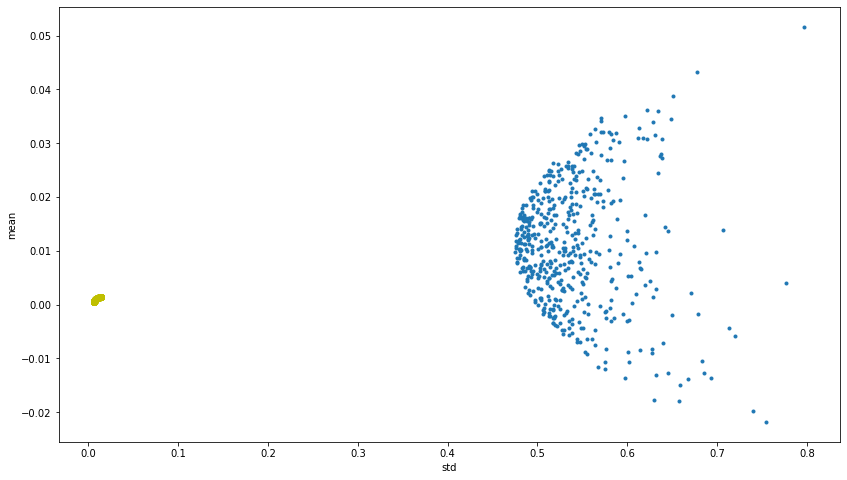

In [157]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_matrix)

fig = plt.figure(figsize=(14,8))
plt.plot(stds, means, '.')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')
#py.iplot_mpl(fig, filename='efficient_frontier', strip_style=True)

In [142]:
np.asmatrix(np.cov(return_matrix))

matrix([[ 1.54973914e-04,  1.63252213e-05,  2.47491011e-05,
          6.51857064e-05,  4.88492896e-05,  4.01677152e-05,
          1.15154390e-04,  6.59834316e-05,  7.49075428e-05,
          8.27433926e-05,  1.16735016e-04,  6.47672610e-05,
          4.30344390e-05,  5.33387780e-05,  5.06675876e-05,
          4.67252981e-05,  3.73655819e-05,  7.48420633e-06,
          5.86442942e-05,  3.74689935e-05,  1.11290960e-04,
          4.10812698e-05,  6.43576189e-05,  6.71405983e-05,
          2.93220078e-05,  8.95126558e-05,  1.43978876e-05,
          5.36156004e-05],
        [ 1.63252213e-05,  9.12993251e-05,  4.09164730e-05,
          1.94994619e-05,  3.65379231e-05,  2.73539765e-05,
          3.68381922e-06,  2.11636623e-05,  9.13648482e-06,
          2.57701016e-05,  2.09176546e-05,  6.83355703e-05,
          3.39966863e-05,  3.35480430e-05,  2.57786773e-05,
          3.25341243e-05,  3.66257062e-05,  1.87737414e-05,
          4.15723469e-05,  2.25117807e-05,  9.54375505e-06,
          3.7

In [143]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''
    p = np.asmatrix(np.mean(returns, axis=1))#==> on fait la moyenne pour chaque titre p c'est une matrice qui contient la moyenne de rentabilité pour a chque actif
    w = np.asmatrix(rand_weights(returns.shape[0])) # ==> w c'est un vecteur qui contient 28 poids generé aleatoirement 
    C = np.asmatrix(np.cov(returns)) # ==> matrice de covariance
    
    mu = w * p.T  # ===> ce vecteur contient l'esperance de chaque actif (poid * la moyenne)
    sigma = np.sqrt(w * C * w.T) # ==> l'ecart type
    
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [ ]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])

In [ ]:
# Création de la figure
fig = plt.figure()

# Tracé du graphique
plt.plot(stds, means, 'o', markersize=5)

# Libellés des axes et titre
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Moyenne et écart type des rendements des portefeuilles générés aléatoirement')

# Affichage du graphique
plt.show()

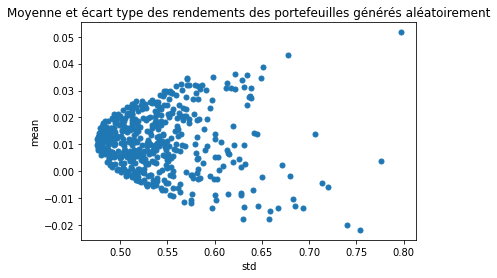

In [109]:
# Création de la figure
fig = plt.figure()

# Tracé du graphique
plt.plot(stds, means, 'o', markersize=5)

# Libellés des axes et titre
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Moyenne et écart type des rendements des portefeuilles générés aléatoirement')

# Affichage du graphique
plt.show()

___

Text(0.5, 1.0, 'Mean and standard deviation of returns of randomly generated portfolios')

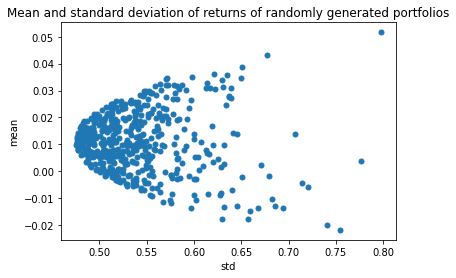

In [15]:
fig = plt.figure()
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')
#py.iplot_mpl(fig, filename='mean_std', strip_style=True)

# Markowitz optimization and the Efficient Frontier

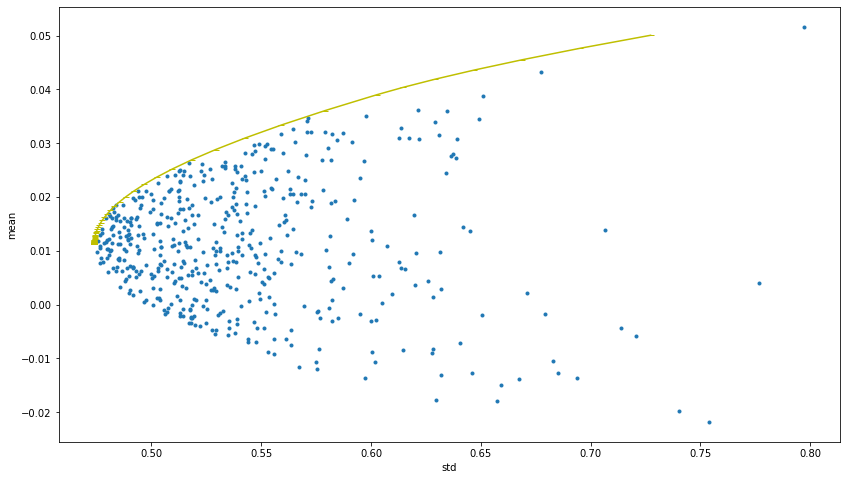

In [144]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)

fig = plt.figure(figsize=(14,8))
plt.plot(stds, means, '.')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-_')
#py.iplot_mpl(fig, filename='efficient_frontier', strip_style=True)

In [45]:
print(weights)
print(sum(weights))

[[2.77880107e-09]
 [3.20322848e-06]
 [1.54301198e-06]
 [9.99995251e-01]]
[1.]


In [47]:
print(returns)
print(len(returns))

[0.05006242898654268, 0.04765655507848342, 0.04551224956952845, 0.043601393870400074, 0.041898169219457396, 0.04038009662980051, 0.039025924731308614, 0.03607770759553383, 0.03338025942195488, 0.030976021278951354, 0.02883336234756262, 0.02692368098022855, 0.025221668615740916, 0.023704745973331852, 0.022352786160706378, 0.021147850249448426, 0.02007394979972068, 0.0191168349376941, 0.018263805382556304, 0.01750353386080277, 0.01682595127016352, 0.016222054398451105, 0.01568383026417202, 0.01520413719659637, 0.014776610112586675, 0.014395576083348943, 0.014055979077617745, 0.01375331288485266, 0.013483561329706469, 0.013243144985191241, 0.013028873680667017, 0.012837904171636534, 0.012667702411737102, 0.012516009929203186, 0.01238081385857304, 0.012260320231346475, 0.012152930171217458, 0.012057218678029483, 0.011971915718941992, 0.011895889375906014, 0.011828130825830235, 0.011767740954135606, 0.011713918424070048, 0.011665949043471409, 0.011623196287882685, 0.011585092854267969, 0.01

In [46]:
print(risks)
print(len(risks))

[0.7273250159698046, 0.6953422660888909, 0.6688478906631505, 0.6470319097285546, 0.6291627687990303, 0.614598082913663, 0.6027683029040827, 0.5791591552387253, 0.5591400288277576, 0.5427113455878009, 0.5292990846497446, 0.5183978940972401, 0.5095725626964915, 0.5024518825121286, 0.49672298065672393, 0.4921248255436207, 0.48844153336483, 0.48549587650185067, 0.4831432595966658, 0.4812662949102173, 0.4797701590313341, 0.4785784010114544, 0.477629633785411, 0.47687465539549323, 0.47627410154279487, 0.4757965242807912, 0.47541682918966116, 0.4751150103595503, 0.4748751304043427, 0.4746845005758229, 0.47453302333508623, 0.47441266621143374, 0.47431704138092545, 0.4742410701342305, 0.4741807153518045, 0.47413276836754914, 0.4740946792676573, 0.47406442183869923, 0.47404038613186783, 0.4740212930225115, 0.47400612627842936, 0.4739940785594312, 0.47398450849777374, 0.47397690658984976, 0.4739708680928352, 0.4739660714893212, 0.473962261377117, 0.47395923487558284, 0.4739568308261859, 0.4739549

In [31]:
import pymongo

Backtesting on real market data

In [60]:
connection_string = "mongodb://localhost:27017"
client = pymongo.MongoClient(connection_string)
data_name = 'MemoireEsgf'
db = client[data_name]
collection = db['RI_PA']
df2 = pd.DataFrame(list(collection.find()))
AAL = df2.drop('_id', axis=1)
AAL.tail()

,Date,Open,High,Low,Close,Volume
273,2023-08-25,191.550003,194.100006,191.550003,193.199997,171467
274,2023-08-28,193.850006,195.199997,193.399994,194.399994,202380
275,2023-08-29,195.350006,196.550003,195.100006,195.649994,233276
276,2023-08-30,196.149994,196.850006,193.350006,194.300003,363511
277,2023-08-31,188.000000,189.000000,181.199997,181.199997,1139961


In [37]:
connection_string = "mongodb://localhost:27017"
client = pymongo.MongoClient(connection_string)
data_name = 'MemoireEsgf'
db = client[data_name]
collection = db['AAP']
df2 = pd.DataFrame(list(collection.find()))
AAP = df2.drop('_id', axis=1)
AAP.tail()

,Date,Open,High,Low,Close,Volume
269,2023-08-25,67.639999,67.720001,63.090000,64.080002,5341000
270,2023-08-28,64.050003,65.989998,64.010002,65.629997,2408500
271,2023-08-29,65.699997,67.169998,65.099998,66.940002,1885700
272,2023-08-30,66.830002,68.150002,66.190002,68.099998,1646400
273,2023-08-31,67.989998,69.760002,67.849998,68.820000,2188741


In [38]:
connection_string = "mongodb://localhost:27017"
client = pymongo.MongoClient(connection_string)
data_name = 'MemoireEsgf'
db = client[data_name]
collection = db['AAPL']
df2 = pd.DataFrame(list(collection.find()))
AAPL = df2.drop('_id', axis=1)
AAPL.tail()

,Date,Open,High,Low,Close,Volume
269,2023-08-25,177.380005,179.149994,175.820007,178.610001,51418700
270,2023-08-28,180.089996,180.589996,178.550003,180.190002,43820700
271,2023-08-29,179.699997,184.899994,179.500000,184.119995,53003900
272,2023-08-30,184.940002,187.850006,184.740005,187.649994,60813900
273,2023-08-31,187.839996,189.119995,187.479996,187.869995,60579365
